## Полезные ссылки

**Начало работы**

- Anaconda (дистрибутив для Python, содержащий в том числе Jupyter Notebook и сам Python): https://www.anaconda.com/download/ - рекомендуется версия Python 3.6 или больше; не забудьте выбрать нужную операционную систему!
- документация по Jupyter: https://jupyter.readthedocs.io/en/latest/
- документация по pip (для установки пакетов в Python с помощью pip install): https://pip.readthedocs.io/en/latest/
- PyCharm: https://www.jetbrains.com/pycharm/

**Общее**

- для любых вопросов: https://www.google.com/
- для (почти) любых ответов: https://stackoverflow.com/
- профессиональный информационно-аналитический ресурс, посвященный машинному обучению, распознаванию образов и интеллектуальному анализу данных: http://www.machinelearning.ru/wiki/index.php?title=Заглавная_страница
- A visual introduction to machine learning: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

**Python & Jupyter**

- A Crash Course in Python for Scientists: http://nbviewer.jupyter.org/gist/rpmuller/5920182
- A Gallery of interesting Jupyter Notebooks: https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks
- Markdown Cheatsheet: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

**pandas**

- документация: http://pandas.pydata.org/pandas-docs/stable/
- 10 minutes to pandas: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Pandas Tutorial: DataFrames in Python: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
- Cheet Sheet: https://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/
- Visualization: http://pandas.pydata.org/pandas-docs/stable/visualization.html

**sklearn**

- документация и многое другое: http://scikit-learn.org/stable/

**Другие библиотеки**

- matplotlib: https://matplotlib.org/users/pyplot_tutorial.html
- seaborn: http://seaborn.pydata.org/

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

KeyboardInterrupt: ignored

## Лабораторная работа 1: работа с Pandas.

Pandas - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов.

In [4]:
import pandas as pd

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двумерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series.

С помощью библиотеки Pandas займемся анализом данных. Будем работать с данными о клиентах банка, который интересуется, произойдет ли просрочка платежа на 90 и более дней при выдаче кредита. 

### 1
Прочтите данные из файла data.csv

*Функции, которые могут пригодиться при решении: `pd.read_csv(..., delimiter=',')`*

In [6]:
# место для кода
fixed_df = pd.read_csv('data.csv', delimiter=',')

### 2
Выведите описание прочтенных данных. 

*Функции, которые могут пригодиться при решении: `.describe()`*

In [7]:
# место для кода
fixed_df.describe()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1094.000000,1350.000000,1350.000000,1350.000000,1350.000000,1307.000000
mean,675.500000,0.060000,3.577895,52.048889,0.257778,356.123363,6438.473492,8.434074,0.080000,0.986667,0.062222,0.737567
std,389.855743,0.237575,84.914699,15.009875,0.751718,1156.603074,7849.754675,5.129287,0.376634,1.008401,0.306555,1.086949
min,1.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,338.250000,0.000000,0.031140,40.000000,0.000000,0.175125,3300.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,675.500000,0.000000,0.156891,52.000000,0.000000,0.367049,5222.500000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,1012.750000,0.000000,0.543145,63.000000,0.000000,0.807001,8055.250000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1350.000000,1.000000,2340.000000,97.000000,10.000000,15466.000000,208333.000000,31.000000,5.000000,8.000000,5.000000,8.000000


### 3
Отобразите несколько первых и несколько последних записей.

*Функции, которые могут пригодиться при решении: `.head(), .tail()`*

*Какие параметры можно передать этим функциям?*

In [8]:
# место для кода
fixed_df.head(3)

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [9]:
fixed_df.tail(2)

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1348,1349,0,0.036934,56,0,0.287935,8362.0,8,0,1,0,2.0
1349,1350,0,0.000000,62,0,1463.000000,NaN,5,0,1,0,0.0


### 4
Прочтите в файле `DataDictionary-ru.txt`, что означают столбцы матрицы. Какому типу принадлежит каждый столбец (вещественный, целый, категориальный)?

In [10]:
# место для ответа
fixed_df.dtypes

Id                                        int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

### 5

Заметьте, что столбец `DebtRatio` содержит неправдоподобные данные. Только значения, соответствующие известному месячному доходу, являются отношениями. Остальные – абсолютные значения месячных выплат процентов. 

Исправьте данные, сделав все значения столбца `DebtRatio` абсолютными (умножьте их на `MonthlyIncome`).  Чтобы ваша программа быстро работала на полных данных, постарайтесь не использовать цикл.

#### *Функции, которые могут пригодиться при решении:*

Обращение к элементам DataFrame:
  * элемент: `data.loc[i, 'названиеСтолбца']`
  * столбец: `data['названиеСтолбца']`
  * подматрица: `data.loc[a:b, списокНазванийСтолбцов]`

Условная индексация:
* `data.loc[data['столбец'] > 20, списокНазванийСтолбцов]`

лучше писать так:

* `i = data['столбец'] > 20`  # вектор `True` и `False`
* `data.loc[i, 'названиеСтолбца']`

У подматриц номера строк наследуются от исходной.

* `pandas.isnull(скаляр или массив)` - проверка, является ли значение неопределенным (`NaN`)
* `pandas.notnull(скаляр или массив)` - проверка, является ли значение определенным (не `NaN`)

In [24]:
# место для кода
i = fixed_df['DebtRatio'] > 20
fixed_df.loc[i, 'DebtRatio'] *= fixed_df['MonthlyIncome']


KeyError: ignored

In [13]:
fixed_df.head(10)

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,NaN,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,NaN,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [23]:
i

0       False
1       False
2       False
3       False
4       False
        ...  
1345    False
1346    False
1347    False
1348    False
1349     True
Name: MonthlyIncome, Length: 1350, dtype: bool

### 6

Поменяйте имя столбца на `Debt`.

*Функции, которые могут пригодиться при решении: `.rename(columns={'староеИмя':'новоеИмя'}, inplace=True)`*

In [14]:
# место для кода
fixed_df.rename(columns={'DebtRatio':'Debt'},inplace=True)

### 7

Вычислите средний ежемесячный доход и присвойте всем клиентам с неизвестным доходом полученное число.

*Функции, которые могут пригодиться при решении: `.mean()`*

*Другие описательные статистики:* https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats

In [15]:
# место для кода --
df_mean = fixed_df["MonthlyIncome"].mean()
i = fixed_df['MonthlyIncome'].isna()
fixed_df.loc[i, 'MonthlyIncome'] = df_mean

In [16]:
df_mean

6438.4734917733085

In [17]:
fixed_df.head(10)

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,Debt,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.0
6,7,0,0.305682,57,0,NaN,6438.473492,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.000000,8,0,0,0,0.0
8,9,0,0.116951,27,0,NaN,6438.473492,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.0


### 8

Используя метод `groupby`, оцените вероятности невозврата кредита (`SeriousDlqin2yrs=1`) для различных значений количества иждивенцев (`NumberOfDependents`).  

Проделайте аналогичную процедуру для различных значений столбца `NumberRealEstateLoansOrLines`

*Подсказка:*
`data['столбец1'].groupby(data['столбец2']).mean()`  *-- расчет средних значений столбца1 по группам из столбца2*

In [18]:
# место для кода
fixed_df['NumberOfDependents'].groupby(fixed_df['SeriousDlqin2yrs']).mean()


SeriousDlqin2yrs
0    0.722313
1    0.974684
Name: NumberOfDependents, dtype: float64

In [19]:
# место для кода
fixed_df.sort_values(by = 'SeriousDlqin2yrs')


,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,Debt,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
674,675,0,0.035606,81,0,0.017261,7125.000000,7,0,0,0,0.0
888,889,0,0.108983,53,0,0.310352,4800.000000,10,0,1,0,0.0
887,888,0,0.347921,42,0,0.373740,13000.000000,11,0,2,0,2.0
886,887,0,0.515976,28,0,0.679854,4650.000000,14,0,1,0,0.0
885,886,0,0.010186,47,0,0.022504,24750.000000,7,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1092,1,1.000000,41,0,NaN,6438.473492,1,2,0,1,NaN
226,227,1,1.953488,38,0,0.153500,3556.000000,5,0,0,0,2.0
214,215,1,0.655316,63,0,NaN,6438.473492,19,0,2,0,0.0
275,276,1,0.220824,46,1,0.637749,1705.000000,5,0,0,0,0.0


## Визуализация данных

In [20]:
import matplotlib.pyplot as plt

#  функция, позволяющая выводить графики прямо в ноутбук
%matplotlib inline

Matplotlib позволяет удобно визуализировать табличные данные.

*Функции, которые могут пригодиться при решении:*

* Рисование:
   * `plt.plot(x, y)`  см. подробнее http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
   * `plt.show()`
   * `plt.scatter(x, y)` - график рассеяния, см. http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
   * `plt.hist()` - гистограмма, см. http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist
* Рисование нескольких графиков на одном:

  `fig, ax = plt.subplots()
   ax.hist(...)
   ax.hist(...)
   plt.show()`
   
* Логарифмическая шкала:
    * `ax.set_xscale('log')`  или `ax.set_yscale('log')`
* Ограничение области графика:
    * `ax.axis([x1, x2, y1, y2])`


### 9a

Постройте график рассеяния на осях `age` и `Debt`. Cиним отметьте клиентов без серьезных задолженностей (`SeriousDlqin2yrs = 0`) и красным — должников (`SeriousDlqin2yrs = 1`).

(20.0, 100.0, 0.0, 2.5)

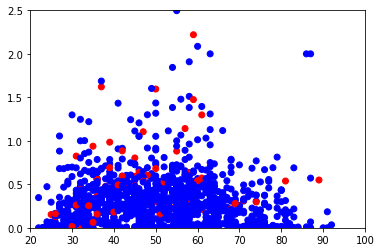

In [36]:
# место для кода
colors = {0:'blue', 1:'red'}

plt.scatter(fixed_df['age'], fixed_df['Debt'], 
            c=[colors[i] for i in fixed_df['SeriousDlqin2yrs']])
plt.axis([20,100,0,2.5])


### 9b
Постройте на одном графике две **нормированные** плотности распределения: красную – для месячного дохода клиентов с задолженностями, синюю – для месячного дохода клиентов без задолженностей. По оси абсцисс отобразите значения до 25000.

In [62]:
# место для кода
p = fixed_df['MonthlyIncome'].groupby(fixed_df['SeriousDlqin2yrs'])
p.groups.keys()


dict_keys([0, 1])

In [63]:
p.get_group(0)

1        2600.000000
2        3042.000000
3        3300.000000
4       63588.000000
5        3500.000000
            ...     
1345     4166.000000
1346     4000.000000
1347    10000.000000
1348     8362.000000
1349     6438.473492
Name: MonthlyIncome, Length: 1269, dtype: float64

(0.0, 1400.0, 0.0, 25000.0)

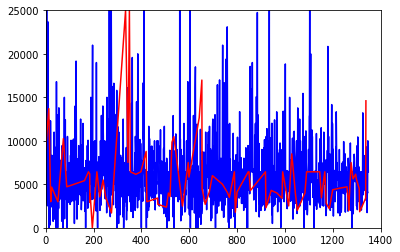

In [76]:
plt.plot(p.get_group(0), 'b')
plt.plot(p.get_group(1), 'r')
plt.axis([0,1400,0,25000])

### 9c*
Визуализируйте попарные зависимости между небинарными признаками `'age', 'MonthlyIncome', 'NumberOfDependents'`. Ограничьте при этом месячный доход значением 25000.

Какие закономерности вы можете наблюдать на получившихся графиках?

*Функции, которые могут пригодиться при решении: `pd.plotting.scatter_matrix()`*

In [ ]:
# место для кода